# Morenny Rock Glacier Optical Imagery Example

## Download data from planet.com website

Create an Account or Log In: To access data, you generally need an account with https://www.planet.com . If you don't have one, you'll need to sign up. Otherwise, log in with your existing credentials.


![Step 1](./data/morenny/optical/planet_screenshot1.png)


## Import AkhDefo Packages.

In [9]:

#Functions for data preparations
import akhdefo_functions
from akhdefo_functions import akhdefo_download_planet
from akhdefo_functions import read_data_prep
from akhdefo_functions import move_files_with_string
from akhdefo_functions import Crop_to_AOI

#Functions data processing
from akhdefo_functions import scatter_area_mask
from akhdefo_functions import Raster_Correction
from akhdefo_functions import Optical_flow_akhdefo

#Functions for shapefile point data interpolation to raster geotif
#Function Autovariogram use Kriging method it fits the data to different variogram models and automatically use the best fit variogram model (Computationally Heavy but you can process data in chunks)
from akhdefo_functions import Auto_Variogram

# interpoate_xyz uses the following interpolation methods (nearest, linear and cubic)
from akhdefo_functions import interpolate_xyz

#Functions for data Visualization and Analysis
from akhdefo_functions import MeanProducts_plot_ts
from akhdefo_functions import plot_stackNetwork
from akhdefo_functions import akhdefo_viewer
from akhdefo_functions import akhdefo_dashApp

## Download Data using Planetlab API Account

In [ ]:

''' 

First Run the below command and make sure {download=False} to see list of available dataset. 

Its highly recommended to use data frame same path for the entire time-series for more accurate results
 
'''

#uncomment below to download data using planet lab api key

''' 
akhdefo_download_planet(planet_api_key='', AOI='./data/morenny/AOI.shp', start_date='May 1, 2018', end_date=' September 30 2022', limit=5, item_type='PSScene',
                        product_bundle='analytic_sr_udm2', 
                        clear_percent=90, cloud_filter=0.1,
                        output_folder='raw_data',
                        clip_flag=True, download_data=False

'''
# for this excecise we download data from planet labs explorer web application 
#Lets Navigate to the zip folder directory

import os

# Replace 'your_directory_path' with the path of your directory
zip_dir = './data/morenny/optical/zip_folder/'

# List all files and directories in the specified path
contents = os.listdir(zip_dir)

# Print the contents
for item in contents:
    print(item)
    
# The zip folder inside the zip folder directory inclue cropped planet lab imagery between 2018 to 2022. lets extract the data and look at the images

## Extract downloaded zip files

In [ ]:
#This functions extracts data from all the granuples zip directory.
read_data_prep(zip_dir=zip_dir,
                                 image_dir='./data/morenny/optical/image_dir', 
                                 ext_image_file='_SR_clip.tif', udm_mask_dir='./data/morenny/optical/udm_mask_dir', ext_udm_mask_file='udm2_clip.tif')

In [ ]:
# This function will move all the data from each granules subdir to a single folder
# move_files_with_string(source_dir='./data/morenny/optical/RS_dir_path129/', dest_dir='./data/morenny/optical/RS_path129', search_string='.tif')
# move_files_with_string(source_dir='./data/morenny/optical/scatter_dir/', dest_dir='./data/morenny/optical/scatter_rs', search_string='.tif')


In [ ]:

''' 
Crop all raster to Area of interest bounding box


'''
Crop_to_AOI(Path_to_WorkingDir='./data/morenny/optical/image_dir', 
                              Path_to_AOI_shapefile='./data/morenny/AOI.shp', 
                              output_CroppedDir='./data/morenny/optical/image_dir_aoi', file_ex='.tif')



## Preparing raster for optical flow and displacement calculation!

The data needs to be converted to "uint8" format and be calibrated and normalized.


In [ ]:
import warnings
warnings.filterwarnings("ignore")


Raster_Correction(input_path="./data/morenny/optical/image_dir_aoi", output_path="./data/morenny/optical/image_dir_aoi_filt", limit=None,
                                    lowpass_kernel_size=None, bilateral_win_size=7, bilateral_sigma_color=75,
                                    bilateral_sigma_spatial=75,
                                    clip_percentiles=[2, 98], optical=True, 
                                    scale=None, Vegetation_mask=None)

## Applying optical flow and producing time-series deformation products.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import akhdefo_functions
akhdefo_functions.Optical_flow_akhdefo(input_dir='./data/morenny/optical/image_dir_aoi_filt', output_dir='./data/morenny/optical/geo', AOI='./data/morenny/AOI.shp', zscore_threshold=2, 
                                       ssim_thresh=0.65, image_resolution='3.125m', interpolate='kriging', 
                                       show_figure=False, point_size=2, dem_path='./data/morenny/dem.tif', smoothing_kernel_size=2, 
                                       Vegetation_mask=None, VEL_scale='year', VEL_Mode='linear', good_match_option=0.75, 
                                       hillshade_option=True, shapefile_output=True, max_triplet_interval=300, pixel_size=20, num_chunks=4, overlap_percentage=0, pyr_scale=0.5, levels=15, 
                                       winsize=32, iterations=7, poly_n=7, poly_sigma=1.5,
                                       flags=1, master_reference='single', 
                                       selection_Mode='pair', start_date=None, end_date=None, krig_method='universal',spatial_ref=True, use_detrend=False,  use_zscore_krig=2, orbit_dir='NS')

Processing:   0%|          | 0/45 [00:00<?, ?it/s]

kriging succeed with Model: Stable and score: 0.9576212381943967
kriging succeed with Model: Integral and score: 0.9390478240539567
kriging succeed with Model: Stable and score: 0.8731964746733141


Processing:   2%|▏         | 1/45 [00:14<10:25, 14.22s/it]

kriging succeed with Model: Rational and score: 0.9139983331588235
kriging succeed with Model: SuperSpherical and score: 0.8666145030625889
Error with model Rational: Internal Error.
kriging succeed with Model: Rational and score: 0.9303100756953023


Processing:   4%|▍         | 2/45 [00:23<08:12, 11.45s/it]

kriging succeed with Model: Integral and score: 0.9856618490094183
kriging succeed with Model: Integral and score: 0.924581546462888
kriging succeed with Model: Integral and score: 0.9497804178675212


Processing:   7%|▋         | 3/45 [00:33<07:19, 10.48s/it]

kriging succeed with Model: Rational and score: 0.9369535193430865
kriging succeed with Model: TPLSimple and score: 0.8780465073212039
Error with model SuperSpherical: Internal Error.
kriging succeed with Model: SuperSpherical and score: 0.8892293501012472


Processing:   9%|▉         | 4/45 [00:45<07:43, 11.31s/it]

kriging succeed with Model: Rational and score: 0.9787993026410422
kriging succeed with Model: Rational and score: 0.9320770135351275
Error with model Rational: Internal Error.
kriging succeed with Model: Rational and score: 0.9708759286770958


Processing:  11%|█         | 5/45 [01:04<09:23, 14.08s/it]

kriging succeed with Model: SuperSpherical and score: 0.9313891226094585
kriging succeed with Model: TPLSimple and score: 0.9478668414274707
kriging succeed with Model: Integral and score: 0.94956383689013


Processing:  16%|█▌        | 7/45 [01:16<05:40,  8.97s/it]

Skipping computation for 20180903 to 20190705 as the time interval is larger than 300 days.
kriging succeed with Model: SuperSpherical and score: 0.9564260435272464
kriging succeed with Model: Rational and score: 0.9646805727738754
Error with model Rational: Internal Error.
kriging succeed with Model: Rational and score: 0.9623059352753093


Processing:  18%|█▊        | 8/45 [02:14<15:12, 24.67s/it]

kriging succeed with Model: SuperSpherical and score: 0.956611907263813
kriging succeed with Model: Rational and score: 0.970982080435402
kriging succeed with Model: Rational and score: 0.9500481697656731


Processing:  20%|██        | 9/45 [03:44<26:57, 44.93s/it]

kriging succeed with Model: Rational and score: 0.9028601418912471
Error with model SuperSpherical: Internal Error.
kriging succeed with Model: SuperSpherical and score: 0.8711854232452272
kriging succeed with Model: SuperSpherical and score: 0.8260773872285109


Processing:  22%|██▏       | 10/45 [04:38<27:55, 47.87s/it]

kriging succeed with Model: SuperSpherical and score: 0.8419663134223835
kriging succeed with Model: Rational and score: 0.9436872267335543
Error with model TPLSimple: Internal Error.
kriging succeed with Model: TPLSimple and score: 0.9101286129514785


Processing:  24%|██▍       | 11/45 [04:51<21:08, 37.31s/it]

kriging succeed with Model: Rational and score: 0.9098672578513867
kriging succeed with Model: Rational and score: 0.9405448169099772
kriging succeed with Model: Rational and score: 0.9428551067378947


Processing:  27%|██▋       | 12/45 [05:03<16:08, 29.35s/it]

kriging succeed with Model: Exponential and score: 0.9583148202226937
kriging succeed with Model: HyperSpherical and score: 0.7540458000859631
kriging succeed with Model: TPLSimple and score: 0.8118946482790906


Processing:  31%|███       | 14/45 [05:09<08:07, 15.74s/it]

Skipping computation for 20190825 to 20200621 as the time interval is larger than 300 days.
kriging succeed with Model: Integral and score: 0.9281707992639562
Error with model Rational: Internal Error.
kriging succeed with Model: Rational and score: 0.9490602919433935
kriging succeed with Model: Rational and score: 0.9414434679666686


Processing:  33%|███▎      | 15/45 [05:17<06:39, 13.33s/it]

kriging succeed with Model: Gaussian and score: 0.9004209529132353
kriging succeed with Model: Spherical and score: 0.6858405949372856
kriging succeed with Model: TPLSimple and score: 0.8902482018290904


Processing:  36%|███▌      | 16/45 [05:22<05:10, 10.71s/it]

kriging succeed with Model: Stable and score: 0.9682233245500771
kriging succeed with Model: Matern and score: 0.9595876411189678
kriging succeed with Model: Rational and score: 0.9672732095941012


Processing:  38%|███▊      | 17/45 [05:30<04:39,  9.99s/it]

kriging succeed with Model: TPLSimple and score: 0.9068114989881503
kriging succeed with Model: HyperSpherical and score: 0.9740655848865825
kriging succeed with Model: Integral and score: 0.9674921659830841


Processing:  40%|████      | 18/45 [05:38<04:16,  9.50s/it]

kriging succeed with Model: TPLSimple and score: 0.6478003460869617
kriging succeed with Model: SuperSpherical and score: 0.6251950621441749
kriging succeed with Model: SuperSpherical and score: 0.6919078765895088


Processing:  42%|████▏     | 19/45 [06:03<06:06, 14.08s/it]

kriging succeed with Model: Stable and score: 0.6992748285193533
kriging succeed with Model: Rational and score: 0.9411851737257053
kriging succeed with Model: Rational and score: 0.9289038673190535


Processing:  44%|████▍     | 20/45 [06:24<06:39, 15.99s/it]

Error with model Stable: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: SuperSpherical and score: 0.41954846505750387
kriging succeed with Model: Rational and score: 0.8867426970436478
kriging succeed with Model: Rational and score: 0.8380844284952692


Processing:  47%|████▋     | 21/45 [06:32<05:29, 13.72s/it]

kriging succeed with Model: Rational and score: 0.9517742468194865
kriging succeed with Model: TPLSimple and score: 0.8752420915528972
kriging succeed with Model: SuperSpherical and score: 0.7265787626444655


Processing:  49%|████▉     | 22/45 [06:45<05:08, 13.41s/it]

kriging succeed with Model: JBessel and score: 0.32320292434434805
kriging succeed with Model: JBessel and score: 0.024756471823207726
Error with model JBessel: Internal Error.
kriging succeed with Model: Matern and score: -10.89711752499421


Processing:  51%|█████     | 23/45 [06:52<04:16, 11.68s/it]

kriging succeed with Model: Exponential and score: 0.9219174683537187
kriging succeed with Model: TPLSimple and score: 0.9468193894892083
kriging succeed with Model: TPLSimple and score: 0.9322562676512777


Processing:  53%|█████▎    | 24/45 [06:57<03:24,  9.72s/it]

kriging succeed with Model: Rational and score: 0.9306747384799147
kriging succeed with Model: TPLSimple and score: 0.9297675757841968
kriging succeed with Model: Stable and score: 0.939736525948597


Processing:  56%|█████▌    | 25/45 [07:04<02:56,  8.81s/it]

kriging succeed with Model: Cubic and score: 0.8816674221059326
kriging succeed with Model: TPLSimple and score: 0.8207969475706594
kriging succeed with Model: TPLSimple and score: 0.8782788829594781


Processing:  58%|█████▊    | 26/45 [07:10<02:29,  7.88s/it]

Error with model Rational: Internal Error.
kriging succeed with Model: Rational and score: 0.8844343888750481
Error with model Matern: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: JBessel and score: 0.9085039602548306
kriging succeed with Model: SuperSpherical and score: 0.9307382217466484


Processing:  60%|██████    | 27/45 [07:20<02:35,  8.64s/it]

kriging succeed with Model: SuperSpherical and score: 0.985004016037058
kriging succeed with Model: TPLSimple and score: 0.9640089447950361
kriging succeed with Model: TPLSimple and score: 0.950383358654279


Processing:  62%|██████▏   | 28/45 [07:28<02:21,  8.33s/it]

kriging succeed with Model: Cubic and score: 0.8826813137763203
Error with model Stable: Internal Error.
Error with model Exponential: Internal Error.
kriging succeed with Model: Stable and score: 0.9591942317380435
kriging succeed with Model: Stable and score: 0.9564407009817336


Processing:  64%|██████▍   | 29/45 [07:39<02:25,  9.08s/it]

kriging succeed with Model: TPLSimple and score: 0.9183973147306165
Error with model Integral: Internal Error.
kriging succeed with Model: Integral and score: 0.9631705402260505
kriging succeed with Model: Rational and score: 0.917536027936305


Processing:  67%|██████▋   | 30/45 [07:49<02:21,  9.41s/it]

kriging succeed with Model: TPLSimple and score: 0.987145768638839
kriging succeed with Model: Matern and score: 0.9956558440096751
kriging succeed with Model: HyperSpherical and score: 0.9884648469369594


Processing:  69%|██████▉   | 31/45 [08:02<02:25, 10.40s/it]

kriging succeed with Model: Rational and score: 0.9622827422118387
kriging succeed with Model: Cubic and score: 0.9974709664799918
kriging succeed with Model: Cubic and score: 0.9972701451769316


Processing:  71%|███████   | 32/45 [08:13<02:20, 10.83s/it]

kriging succeed with Model: JBessel and score: 0.202016098372935
kriging succeed with Model: JBessel and score: 0.2983265704185346
Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: 0.14589225544527873


Processing:  73%|███████▎  | 33/45 [08:20<01:55,  9.64s/it]

kriging succeed with Model: JBessel and score: 0.8758269659564246
kriging succeed with Model: JBessel and score: 0.9182137962082151
kriging succeed with Model: Rational and score: 0.8688981246733729


Processing:  76%|███████▌  | 34/45 [08:32<01:52, 10.23s/it]

kriging succeed with Model: TPLSimple and score: 0.94220908833422
kriging succeed with Model: Cubic and score: 0.9404818866411484
kriging succeed with Model: Integral and score: 0.8575913576229593


Processing:  78%|███████▊  | 35/45 [08:38<01:28,  8.88s/it]

kriging succeed with Model: Matern and score: 0.9465530482334543
kriging succeed with Model: Stable and score: 0.9768269400641062
kriging succeed with Model: Stable and score: 0.9510474796126582


Processing:  80%|████████  | 36/45 [08:46<01:19,  8.82s/it]

Error with model Stable: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: Integral and score: 0.9640359604269995
kriging succeed with Model: Stable and score: 0.9920988743986683
kriging succeed with Model: Stable and score: 0.9887020581065434


Processing:  82%|████████▏ | 37/45 [08:56<01:12,  9.08s/it]

kriging succeed with Model: TPLSimple and score: 0.909065822145868
kriging succeed with Model: TPLSimple and score: 0.7743498850940775
kriging succeed with Model: TPLSimple and score: 0.8520633785749162


Processing:  84%|████████▍ | 38/45 [09:02<00:57,  8.22s/it]

kriging succeed with Model: SuperSpherical and score: 0.8225316495774966
kriging succeed with Model: Matern and score: 0.970561244479182
kriging succeed with Model: TPLSimple and score: 0.9593582147663215


Processing:  87%|████████▋ | 39/45 [09:09<00:46,  7.79s/it]

kriging succeed with Model: Integral and score: 0.9754020362315057
kriging succeed with Model: TPLSimple and score: 0.9815838820491041
kriging succeed with Model: SuperSpherical and score: 0.9771624746904917


Processing:  89%|████████▉ | 40/45 [09:19<00:41,  8.35s/it]

kriging succeed with Model: Rational and score: 0.9644757216418057
kriging succeed with Model: Integral and score: 0.9663018312499948
kriging succeed with Model: TPLSimple and score: 0.9616056050912949


Processing:  91%|█████████ | 41/45 [09:27<00:33,  8.36s/it]

kriging succeed with Model: Stable and score: 0.9804197281574024
kriging succeed with Model: JBessel and score: 0.7817602715267865
kriging succeed with Model: Rational and score: 0.9089435070615016


Processing:  93%|█████████▎| 42/45 [09:36<00:25,  8.62s/it]

kriging succeed with Model: TPLSimple and score: 0.9295798941217976
kriging succeed with Model: Stable and score: 0.9835288016755827
Error with model Stable: Internal Error.
kriging succeed with Model: Stable and score: 0.9636377564567452


Processing:  96%|█████████▌| 43/45 [09:44<00:16,  8.29s/it]

Error with model Integral: Internal Error.
kriging succeed with Model: Integral and score: 0.8358283213811151
kriging succeed with Model: Integral and score: 0.9391775024429282
kriging succeed with Model: Integral and score: 0.9425335196830441


Processing:  98%|█████████▊| 44/45 [09:53<00:08,  8.60s/it]

kriging succeed with Model: Integral and score: 0.9854249059134373
kriging succeed with Model: SuperSpherical and score: 0.9931739494797703
Error with model Integral: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Error with model Stable: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: Matern and score: 0.9894471583449027


Processing: 100%|██████████| 45/45 [10:19<00:00, 13.77s/it]


Wait for processing to complete writing data into shapefile for timeseries...


Processing: Update Shapefiles :   0%|          | 0/3 [00:00<?, ?it/s]

processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_2DVEL.shp started...  

best match 472
472


Processing: Update Shapefiles :  33%|███▎      | 1/3 [03:19<06:38, 199.10s/it]

ReferencePoint x, y: (662480.2641448975, 4763439.8212509155), VEL, VEL_STD: (-0.18114084538679412, 0.09899980454019985)
processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_2DVEL.shp completed...  

processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_N.shp started...  

472


Processing: Update Shapefiles :  67%|██████▋   | 2/3 [06:27<03:13, 193.03s/it]

ReferencePoint x, y: (662480.2641448975, 4763439.8212509155), VEL, VEL_STD: (-0.46925999031720117, 0.07713549874141103)
processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_N.shp completed...  

processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_E.shp started...  

472


Processing: Update Shapefiles : 100%|██████████| 3/3 [10:42<00:00, 214.25s/it]

ReferencePoint x, y: (662480.2641448975, 4763439.8212509155), VEL, VEL_STD: (0.1929592801690296, 0.06113693892331595)
processing ./data/morenny/optical/geo/temp_shapefile_dir/20180627_20220926_20220926_E.shp completed...  

Total Days: 1552
file used ./data/morenny/optical/geo/temp_shapefile_dir\updated_shapefiles\20180627_20220926_20220926_2DVEL.shp.xml


start calculating aspect...
calculating aspect completed


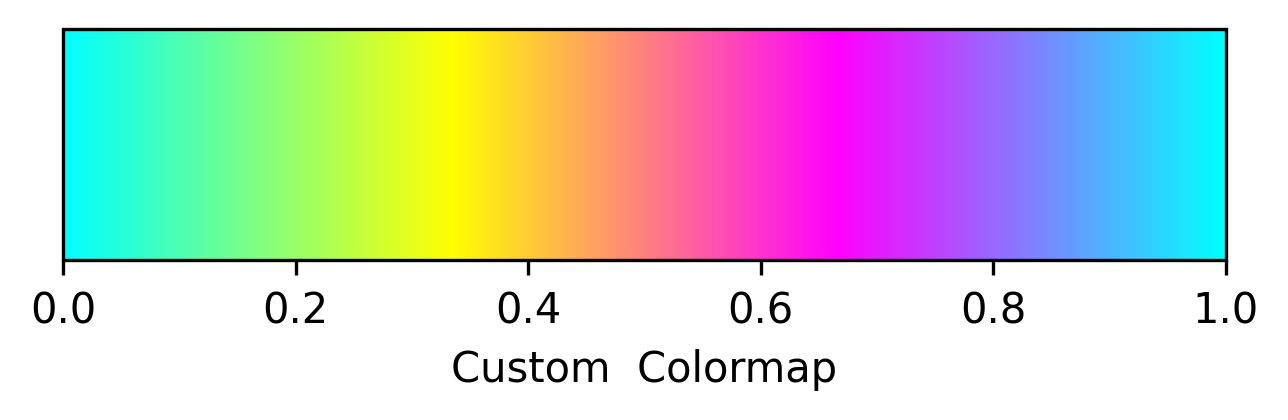

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colorbar import ColorbarBase

# Define the custom CMY colors (normalized to [0, 1])
custom_colors = [
    (0, 1, 1),    # Cyan
    (1, 1, 0)     # Yellow
    ,(1, 0, 1)    # Magenta
    , (0, 1, 1)   # Cyan
    
]

# Create the custom CMY colormap with a specified number of bins (256 in this case)
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_cmy", custom_colors, N=256)

# Display the custom CMY colormap
fig, ax = plt.subplots(figsize=(5, 1), dpi=300)
cbar_cmy = ColorbarBase(ax, cmap=custom_colormap, orientation='horizontal')
cbar_cmy.set_label('Custom  Colormap')
plt.show()


Attempting to create temporary file: C:\Users\mahmud\AppData\Local\Temp\tmpx4k8pntw\temp_20180820_20180903_20180903_universal.tif
Checking existence of temporary file: C:\Users\mahmud\AppData\Local\Temp\tmpx4k8pntw\temp_20180820_20180903_20180903_universal.tif
Temporary file C:\Users\mahmud\AppData\Local\Temp\tmpx4k8pntw\temp_20180820_20180903_20180903_universal.tif found.
File overwritten at C:\Users\mahmud\AppData\Local\Temp\tmpx4k8pntw\20180820_20180903_20180903_universal.tif
Attempting to create temporary file: C:\Users\mahmud\AppData\Local\Temp\tmpx4k8pntw\temp_dem.tif
Checking existence of temporary file: C:\Users\mahmud\AppData\Local\Temp\tmpx4k8pntw\temp_dem.tif
Temporary file C:\Users\mahmud\AppData\Local\Temp\tmpx4k8pntw\temp_dem.tif found.
File overwritten at C:\Users\mahmud\AppData\Local\Temp\tmpx4k8pntw\dem.tif
bounds:  BoundingBox(left=76.98683030788716, bottom=42.991173933234215, right=77.00480882286293, top=43.00947661942511)


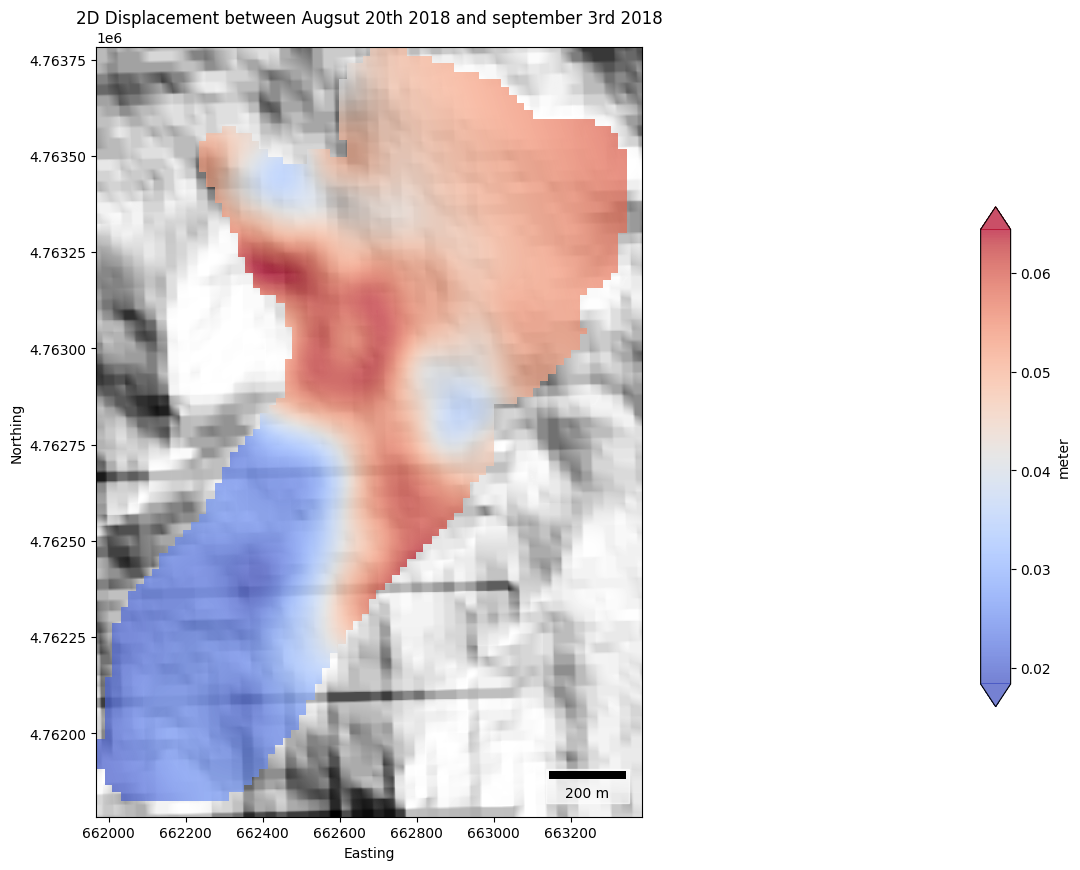

In [2]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/morenny/dem.tif', raster_file='./data/morenny/optical/20180820_20180903_20180903_universal.tif', 
                                 output_folder='./data/morenny/optical/Figs_analysis/',
                                 title='2D Displacement between Augsut 20th 2018 and september 3rd 2018', 
                   pixel_resolution_meters=None, output_file_name="custom_dates.png", 
                   alpha=0.7, unit_conversion=None, no_data_mask=True, 
                   colormap='coolwarm'
                   , min_value=None, max_value=None, 
                   normalize=True, colorbar_label='meter',
                   show_figure=True)

In [1]:
import akhdefo_functions
from akhdefo_functions import Auto_Variogram

Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_N.shp', column_attribute='VEL'
               , pixel_size=20, num_chunks=4, out_fileName='N', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=3, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal')


Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_E.shp', column_attribute='VEL'
               , pixel_size=20, num_chunks=4, out_fileName='E', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=3, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal')



Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp', column_attribute='VEL'
               , pixel_size=20, num_chunks=4, out_fileName='2DVEL', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=3, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal', detrend_data=True)



Auto_Variogram(data='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp', column_attribute='aspect'
               , pixel_size=20, num_chunks=4, out_fileName='aspect_test', geo_folder='./data/morenny/optical/VEL_Folder', plot_folder='./data/morenny/optical/VEL_Folder'
               , smoothing_kernel=3, latlon=False, aoi_shapefile='./data/morenny/AOI.shp' , krig_method='universal', detrend_data=True)

c:\Users\mahmud\anaconda3\envs\akhdefov2\lib\site-packages\gstools\covmodel\plot.py:114: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



kriging succeed with Model: SuperSpherical and score: 0.9971249435633655


c:\Users\mahmud\anaconda3\envs\akhdefov2\lib\site-packages\gstools\covmodel\plot.py:114: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



kriging succeed with Model: Matern and score: 0.9937670915422188


c:\Users\mahmud\anaconda3\envs\akhdefov2\lib\site-packages\gstools\covmodel\plot.py:114: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



kriging succeed with Model: Matern and score: 0.9958848320356669


c:\Users\mahmud\anaconda3\envs\akhdefov2\lib\site-packages\gstools\covmodel\plot.py:114: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



Error with model Exponential: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Error with model SuperSpherical: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Error with model JBessel: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Error with model TPLSimple: Optimal parameters not found: The maximum number of function evaluations is exceeded.
kriging succeed with Model: Cubic and score: 0.8696528605202475


array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan, 288.53496645, 287.13243049, ...,          nan,
                 nan,          nan],
       [         nan,          nan, 286.73234103, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

## Visualize Displacement Products

In [3]:
akhdefo_functions.calculate_and_save_aspect_raster(ew_raster_path= './data/morenny/optical/VEL_Folder/E_universal.tif', ns_raster_path= './data/morenny/optical/VEL_Folder/N_universal.tif',
                                 output_raster_path= './data/morenny/optical/VEL_Folder/aspect.tif')

* Lets plot Annual Linear velocity in merter/year overlayed by detrended vector motion.
* Zero value of the aspect colorbar represents True North, Negative west and Positive is East. for instance -40 is equal direction of movement North 40 degree towards west (40NW)

Attempting to create temporary file: C:\Users\mahmud\AppData\Local\Temp\tmp03pwvy55\temp_2DVEL_universal_detrend.tif
Checking existence of temporary file: C:\Users\mahmud\AppData\Local\Temp\tmp03pwvy55\temp_2DVEL_universal_detrend.tif
Temporary file C:\Users\mahmud\AppData\Local\Temp\tmp03pwvy55\temp_2DVEL_universal_detrend.tif found.
File overwritten at C:\Users\mahmud\AppData\Local\Temp\tmp03pwvy55\2DVEL_universal_detrend.tif
Attempting to create temporary file: C:\Users\mahmud\AppData\Local\Temp\tmp03pwvy55\temp_dem.tif
Checking existence of temporary file: C:\Users\mahmud\AppData\Local\Temp\tmp03pwvy55\temp_dem.tif
Temporary file C:\Users\mahmud\AppData\Local\Temp\tmp03pwvy55\temp_dem.tif found.
File overwritten at C:\Users\mahmud\AppData\Local\Temp\tmp03pwvy55\dem.tif
bounds:  BoundingBox(left=76.98683665174987, bottom=42.99136677230963, right=77.00503875374551, top=43.00947661942511)
Attempting to create temporary file: C:\Users\mahmud\AppData\Local\Temp\tmppivg_lsp\temp_aspect_t

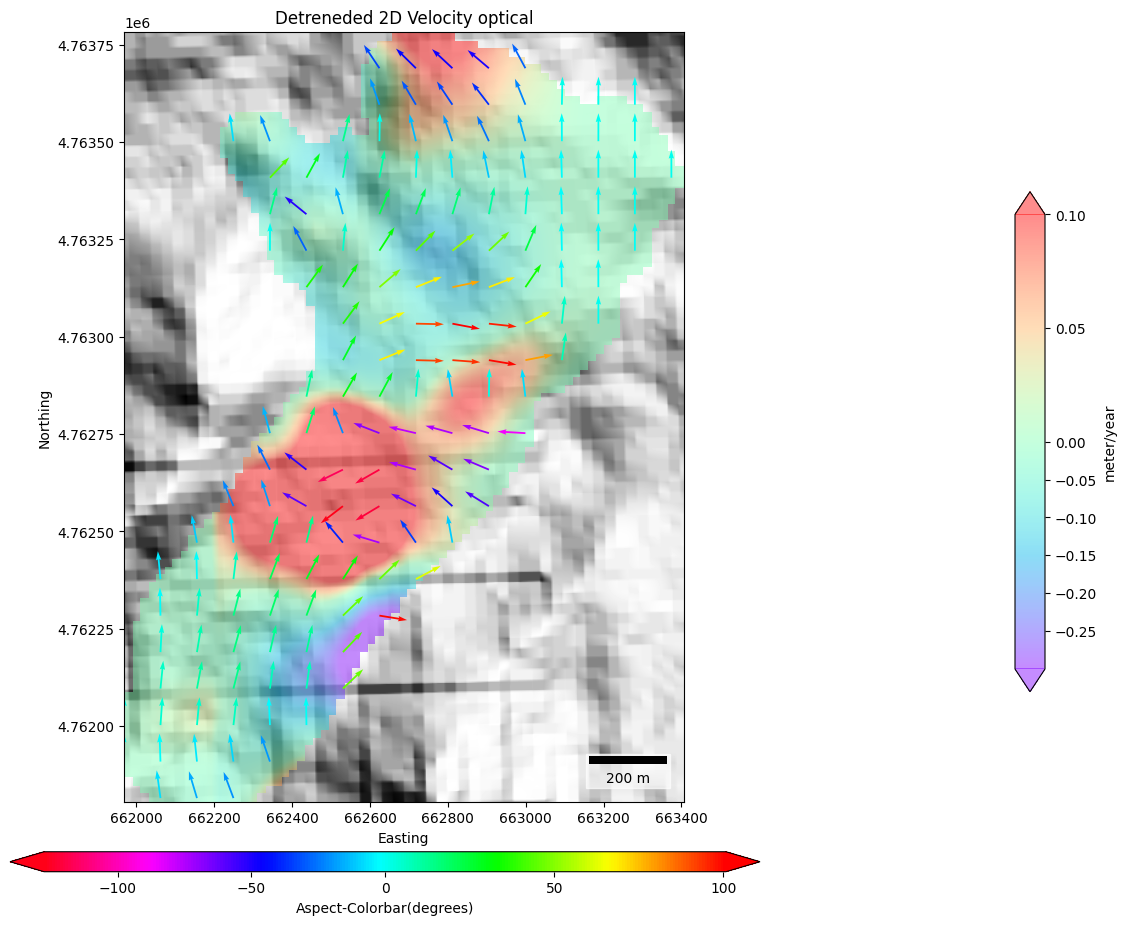

In [4]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/morenny/dem.tif', raster_file='./data/morenny/optical/VEL_Folder/detrend/2DVEL_universal_detrend.tif', 
                                 output_folder='./data/morenny/optical/Figs_analysis/',
                                 title='Detreneded 2D Velocity optical', 
                   pixel_resolution_meters=None, output_file_name="2DVEL_WithVectorMotion_detrend.png", 
                   alpha=1, unit_conversion=None, no_data_mask=True, 
                   colormap='rainbow'
                   , min_value=-0.3, max_value=0.1, 
                   normalize=True, colorbar_label='meter/year',
                   show_figure=True, aspect_raster='./data/morenny/optical/VEL_Folder/detrend/aspect_test_universal_detrend.tif', cmap_aspect='hsv_r' , step=30)

Attempting to create temporary file: C:\Users\mahmud\AppData\Local\Temp\tmpv9r9cpve\temp_2DVEL.tif
Checking existence of temporary file: C:\Users\mahmud\AppData\Local\Temp\tmpv9r9cpve\temp_2DVEL.tif
Temporary file C:\Users\mahmud\AppData\Local\Temp\tmpv9r9cpve\temp_2DVEL.tif found.
File overwritten at C:\Users\mahmud\AppData\Local\Temp\tmpv9r9cpve\2DVEL.tif
Attempting to create temporary file: C:\Users\mahmud\AppData\Local\Temp\tmpv9r9cpve\temp_basemap.tif
Checking existence of temporary file: C:\Users\mahmud\AppData\Local\Temp\tmpv9r9cpve\temp_basemap.tif
Temporary file C:\Users\mahmud\AppData\Local\Temp\tmpv9r9cpve\temp_basemap.tif found.
File overwritten at C:\Users\mahmud\AppData\Local\Temp\tmpv9r9cpve\basemap.tif
bounds:  BoundingBox(left=76.98684190814166, bottom=42.991537943032334, right=77.00457889193294, top=43.00947661942507)
Attempting to create temporary file: C:\Users\mahmud\AppData\Local\Temp\tmpf5fqyb49\temp_aspect_test_universal_detrend.tif
Checking existence of tempora

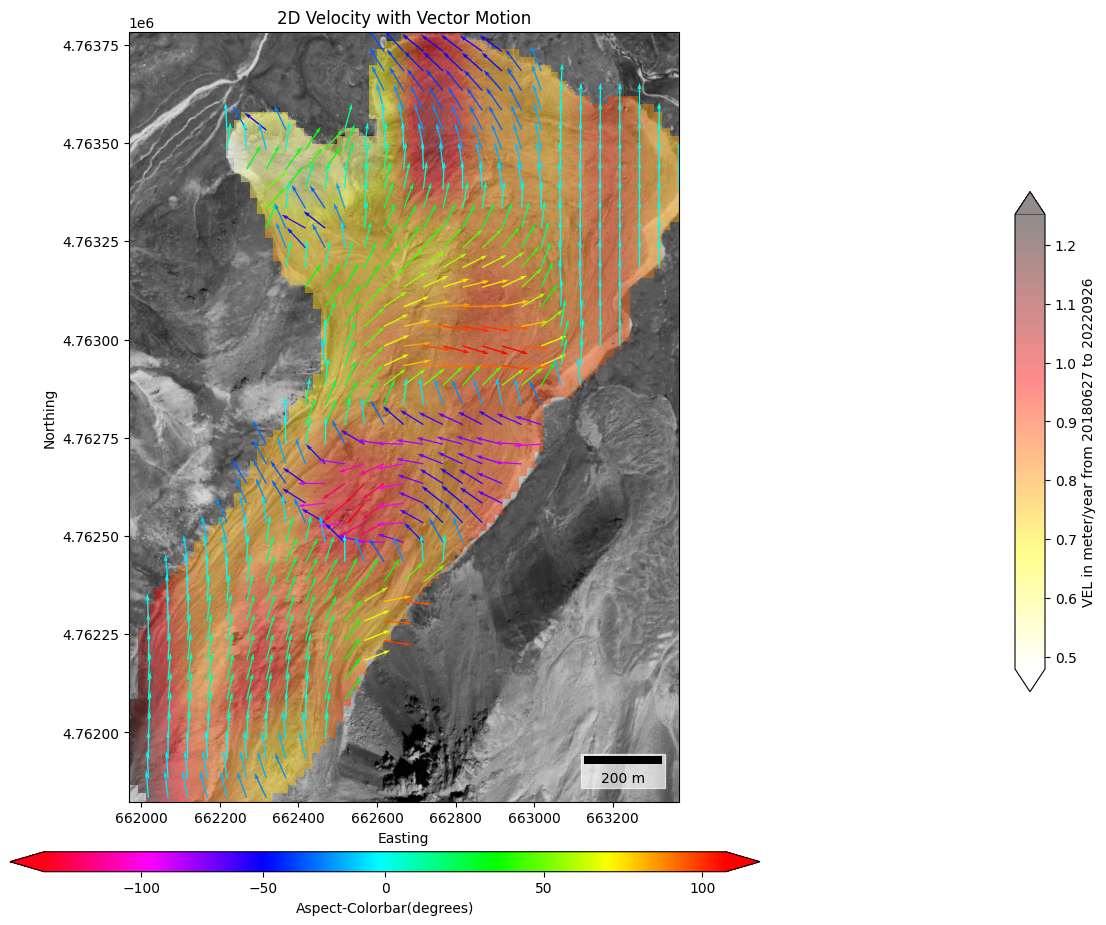

In [4]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/morenny/basemap.tif', raster_file='./data/morenny/optical/VEL_Folder/2DVEL.tif', output_folder='./data/morenny/optical/Figs_analysis/',
                                 title='2D Velocity with Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="2DVEL_WithVectorMotion.png", 
                   alpha=1, unit_conversion=None, no_data_mask=True, 
                   colormap='hot_r'
                   , min_value=None, max_value=None, 
                   normalize=True, colorbar_label='VEL in meter/year from 20180627 to 20220926',
                   show_figure=True, aspect_raster='./data/morenny/optical/VEL_Folder/detrend/aspect_test_universal_detrend.tif', cmap_aspect='hsv_r' , step=50)

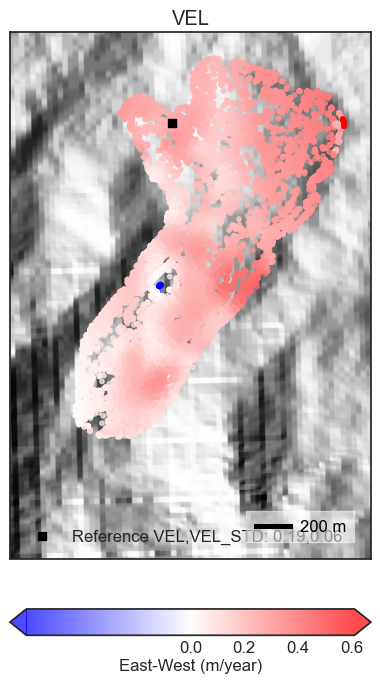

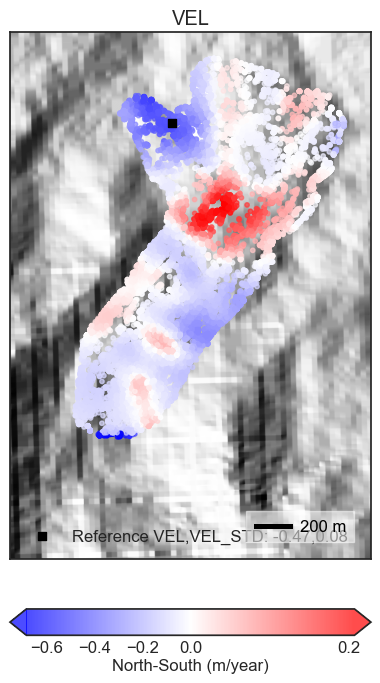

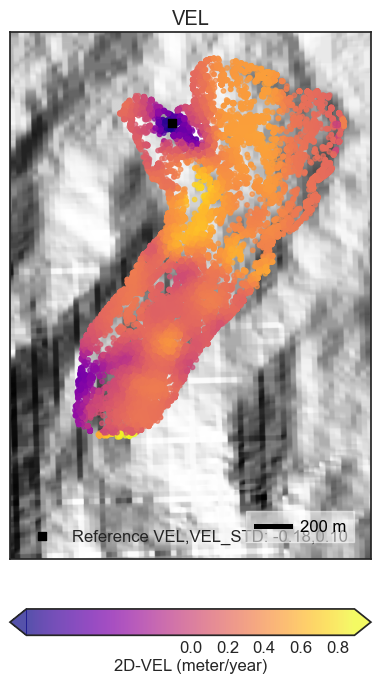

In [11]:
#Visualize Mean Velocity East-West
# if set batch_plot=True it will plot static time series figure for each date acquisition 
import akhdefo_functions
akhdefo_functions.MeanProducts_plot_ts(path_to_shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_E.shp', 
                                       dem_path='./data/morenny/dem.tif', out_folder='./data/morenny/optical/Figs_analysis/E', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='bwr', point_size=10, 
                                       cbar_label='East-West (m/year)', 
                                       batch_plot=False)

#Visualize Mean Velocity North-South
akhdefo_functions.MeanProducts_plot_ts(path_to_shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_N.shp', 
                                       dem_path='./data/morenny/dem.tif', out_folder='./data/morenny/optical/Figs_analysis/N', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='bwr', point_size=10, 
                                       cbar_label='North-South (m/year)', 
                                       batch_plot=False)

#Visualize Mean Velocity 2D Velocity 
akhdefo_functions.MeanProducts_plot_ts(path_to_shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp', 
                                       dem_path='./data/morenny/dem.tif', out_folder='./data/morenny/optical/Figs_analysis/2D', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='plasma', point_size=10, 
                                       cbar_label='2D-VEL (meter/year)', 
                                       batch_plot=False, plot_inverse_Vel=False)

## Interactive Time Series Analysis in a Dash Web App

This plot is part of an interactive web application. Users have the ability to select groups of data points using either the box select or lasso tool, which are superimposed on a satellite image base map. The selected data will then be reflected in the time series chart. Additionally, users can customize the axis labels to suit their dataset; for example, if the dataset measures displacement or velocity in meters, the y-axis label can be adjusted accordingly from the default mm. Furthermore, users can download their analysis and the generated figures directly from the web application.


![Step 1](./data/morenny/optical/dash2d1.png)

![dash2d_optical output sample1](./data/morenny/optical/google_overlay_velocity.jpg)


In [1]:
import akhdefo_functions

akhdefo_functions.akhdefo_dashApp(
Path_to_Shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_2DVEL.shp',
                                  port=8047, BaseMap=True, basemap_type='image')

In [ ]:

akhdefo_dashApp(
Path_to_Shapefile='../data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_N.shp',
                                  port=8056, BaseMap=True, basemap_type='image')

In [ ]:

akhdefo_dashApp(
Path_to_Shapefile='./data/morenny/optical/geo/temp_shapefile_dir/updated_shapefiles/20180627_20220926_20220926_E.shp',
                                  port=8055, BaseMap=True, basemap_type='image')